# Traitement d'images : filtrage, seuillage, et comptage d'objets avec opencv

Une initiation à la biblithèque opencv 

In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 975.2 kB/s eta 0:00:40
   ---------------------------------------- 0.2/38.6 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.3/38.6 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.6/38.6 MB 2.7 MB/s eta 0:00:14
   - -------------------------------------- 1.0/38.6 MB 3.4 MB/s eta 0:00:11
   - -------------------------------------- 1.1/38.6 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.4/38.6 MB 3.8 MB/s eta 0:00:10
   -- ------------------------------------- 2.0/38.6 MB 4.8 MB/s eta 0:00:08
   -- ---------------

# Veille technologique: Opencv python

-  Suivre les instructions et faire une recherche selon ce qui est demandé.

## Operations Simples

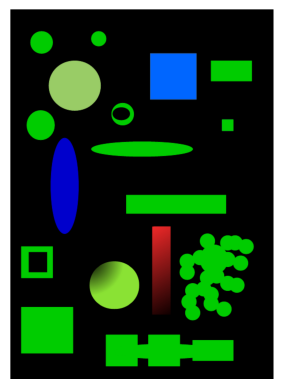

In [2]:
# use opencv to load and display the image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.io import imread, imshow, imsave

# lire l'image (avec imread)
image = cv2.imread('image_01.png')
# afficher image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [3]:
# afficher la taille de l'image
image.shape

(760, 541, 3)

In [4]:
# l'image a trois couleur R,G,B. afficher les valeurs des trois couleurs pour le pixel x = 150, et y = 100
x = 150
y = 100
blue_value = image[y, x, 0]
green_value = image[y, x, 1]
red_value = image[y, x, 2]

print(f"Pixel values at (x={x}, y={y}):")
print(f"Red: {red_value}")
print(f"Green: {green_value}")
print(f"Blue: {blue_value}")

Pixel values at (x=150, y=100):
Red: 0
Green: 0
Blue: 0


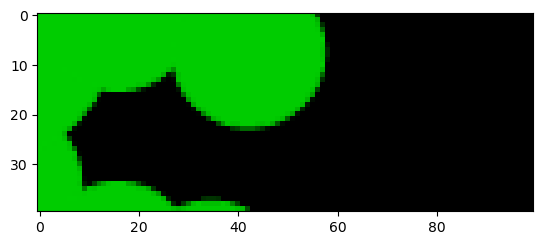

In [5]:
top=514
right=430
height= 40
width=100
croped_image = image[top : (top + height) , right: (right + width)]
plt.imshow(croped_image, cmap="gray")
plt.show()

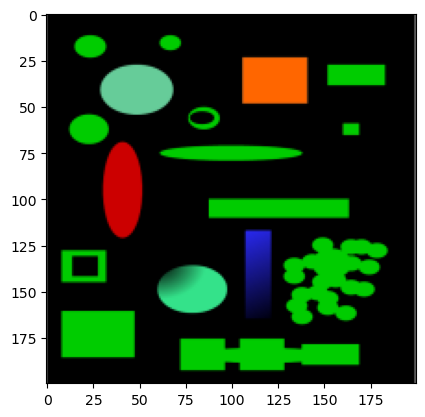

In [6]:
# redimensioner l'image à 200x200 pixels
resized = None

dim = (200, 200)

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized, cmap="gray")
plt.show()

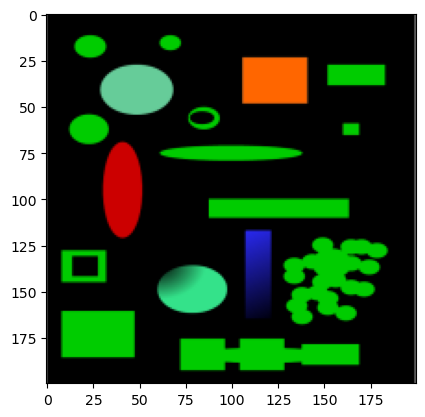

In [7]:
# redimensinner sans affecter l'image
scale_percent = 60 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (200, 200)
  
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap="gray")
plt.show()

In [8]:
!pip install imutils

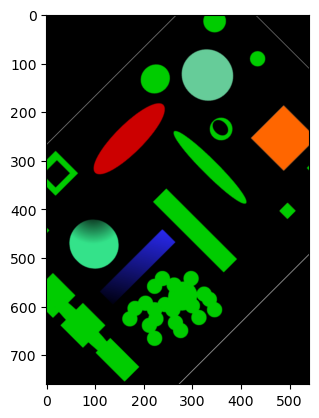

In [9]:
import imutils
rotated = imutils.rotate(image, -45)
plt.imshow(rotated)

Vous pouvez utiliser la bibliothèque imutils pour faire les rotations et d'autres fonctions facilement. Pour l'instaler: pip install imutils

# Dessiner sur l'image

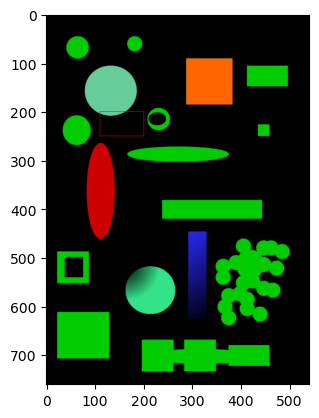

In [10]:
# dessiner un rectangle
image = cv2.rectangle(image, (110, 200), (200, 250), (255, 0, 0), 1)
plt.imshow(image)

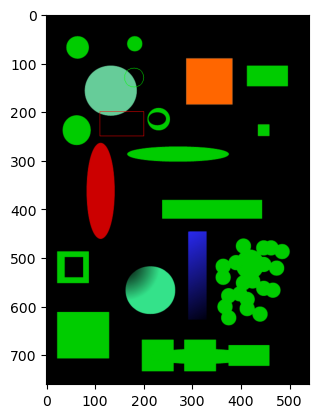

In [11]:
# dessiner un circle
image = cv2.circle(image, (180, 130), 20, (0, 255, 0), 1)
plt.imshow(image)

# Filtrage d'image

* Blur
* Gaussian blur
* Median blur
* Sharpening
* Bilateral blur
* Bilateral filtering

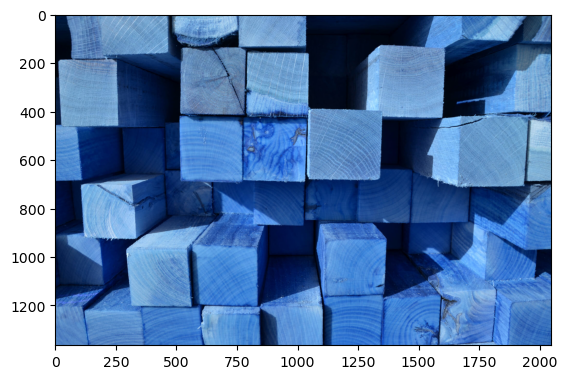

In [12]:
# charger et afficher l'image "bois"
image2 = cv2.imread('bois.png')
plt.imshow(image2)

In [17]:
# Utiliser la méthode "cv2.filter2D" avec un kernel de taille 2
kernel = np.ones((2,2), np.float32) / 4  # Création d'un noyau de moyennage

# Appliquer le filtre
filtered_image = cv2.filter2D(image2, -1, kernel)

# Afficher l'image originale et l'image filtrée
cv2.imshow("Original", image2)
cv2.imshow("Filtered", filtered_image)

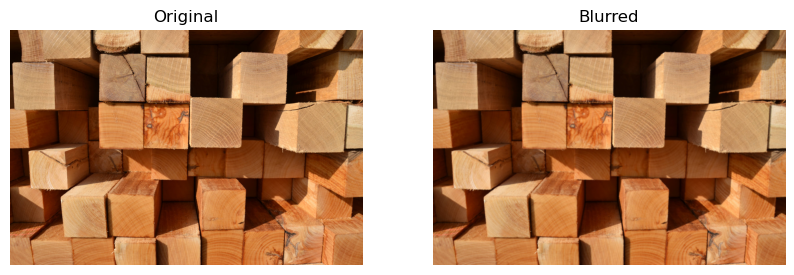

In [13]:
# Appliquer le flou avec un kernel de taille 5x5
blurred_image = cv2.blur(image2, (5, 5))

# Afficher les images dans le notebook
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)), plt.title('Blurred')
plt.axis('off')
plt.show()


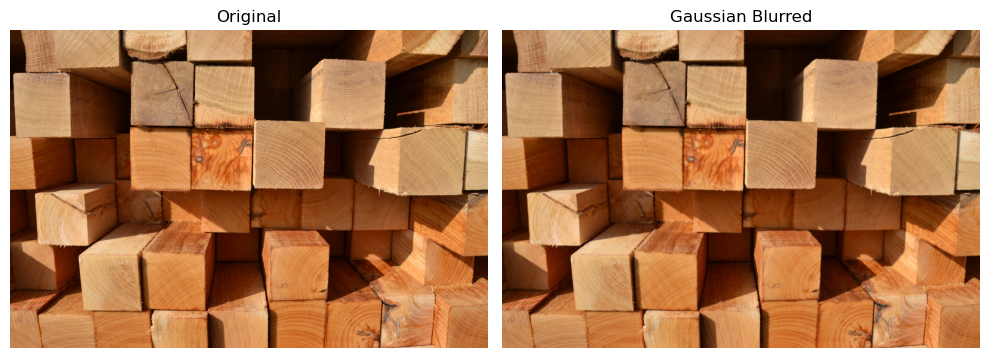

In [14]:
blurred_image = cv2.GaussianBlur(image2, (5, 5), 0)

    # Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred")
plt.axis('off')

plt.tight_layout()
plt.show()

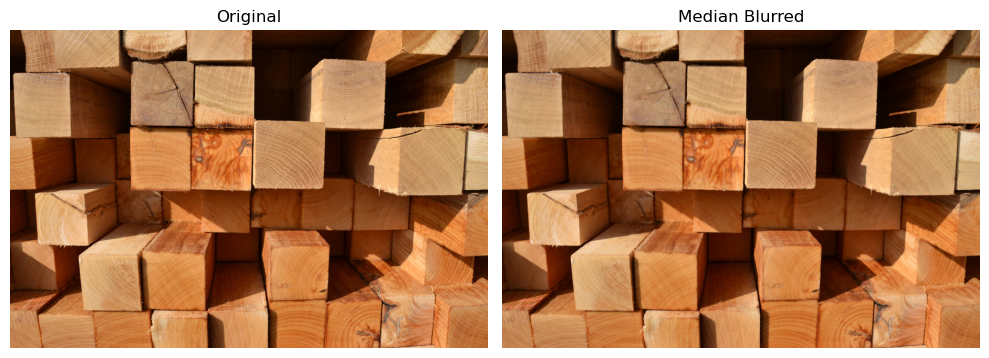

In [15]:
# Appliquer le flou médian avec un kernel de taille 5x5
median_blurred_image = cv2.medianBlur(image2, 5)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(median_blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Median Blurred")
plt.axis('off')

plt.tight_layout()
plt.show()

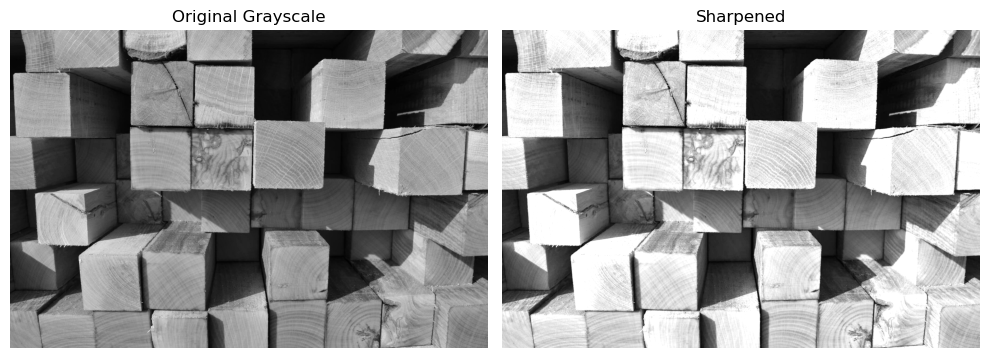

In [17]:
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre Laplacien pour détecter les contours
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Convertir le type de données de l'image Laplacienne pour qu'il corresponde à celui de l'image en niveaux de gris
laplacian = cv2.convertScaleAbs(laplacian)

# Renforcer les contours et accentuer l'image
sharpened_image = cv2.addWeighted(gray_image, 1.5, laplacian, -0.5, 0)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened")
plt.axis('off')

plt.tight_layout()
plt.show()


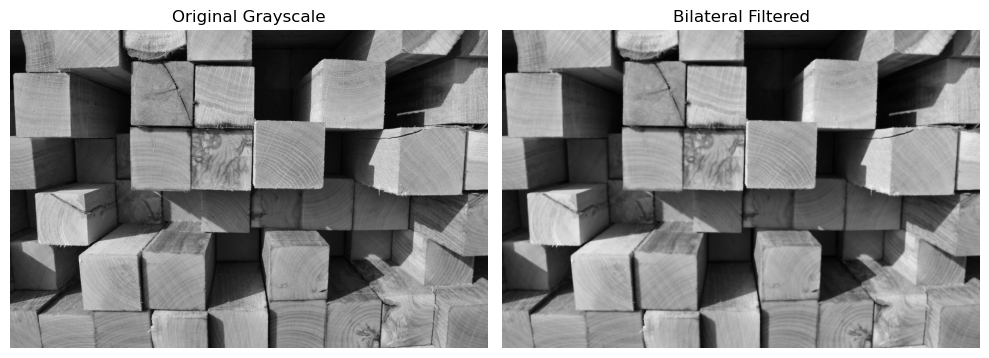

In [18]:
# bilateral filtering
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre bilatéral
bilateral_filtered_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title("Bilateral Filtered")
plt.axis('off')

plt.tight_layout()
plt.show()


# Seuillage d'image

En utilisant l'image "sudoku" appliquer:
* Binary Thresholding
* Otsu thresholding
* Adaptive thresholding

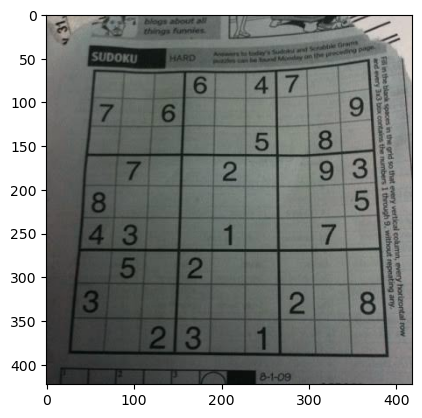

In [20]:
image3 = cv2.imread('sudoku.jpg')
plt.imshow(image3)

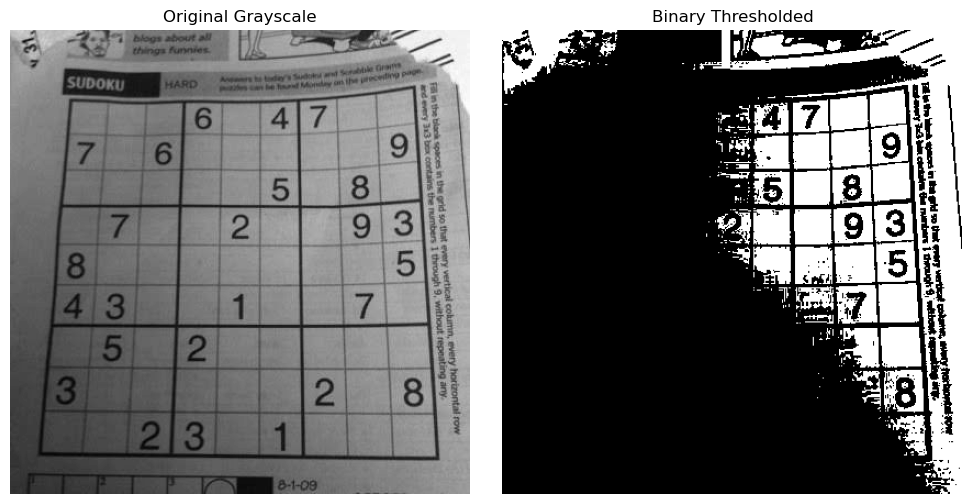

In [21]:
# appliquer un seuillage binaire d'un seuil de 127
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire avec un seuil de 127
_, binary_thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_thresholded_image, cmap='gray')
plt.title("Binary Thresholded")
plt.axis('off')

plt.tight_layout()
plt.show()

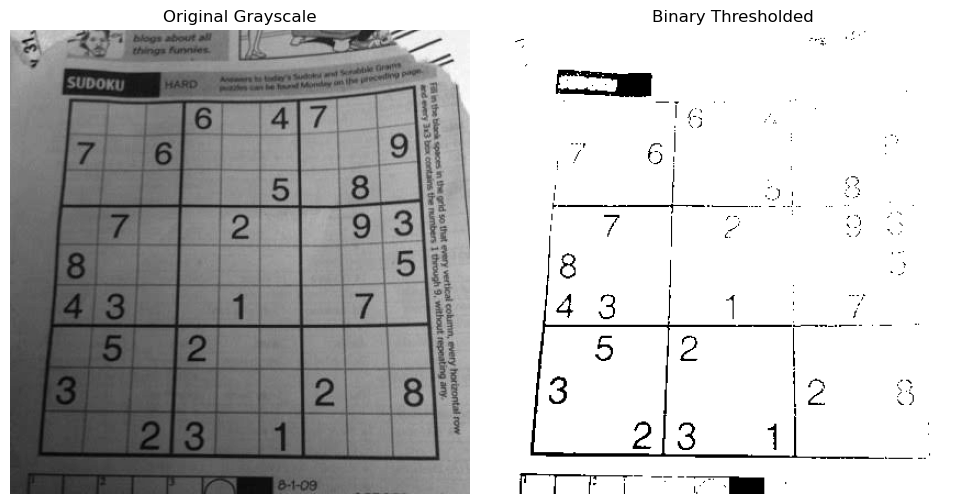

In [22]:
# appliquer un seuillage binaire d'un seuil de 30
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire avec un seuil de 30
_, binary_thresholded_image = cv2.threshold(gray_image, 30, 255, cv2.THRESH_BINARY)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_thresholded_image, cmap='gray')
plt.title("Binary Thresholded")
plt.axis('off')

plt.tight_layout()
plt.show()

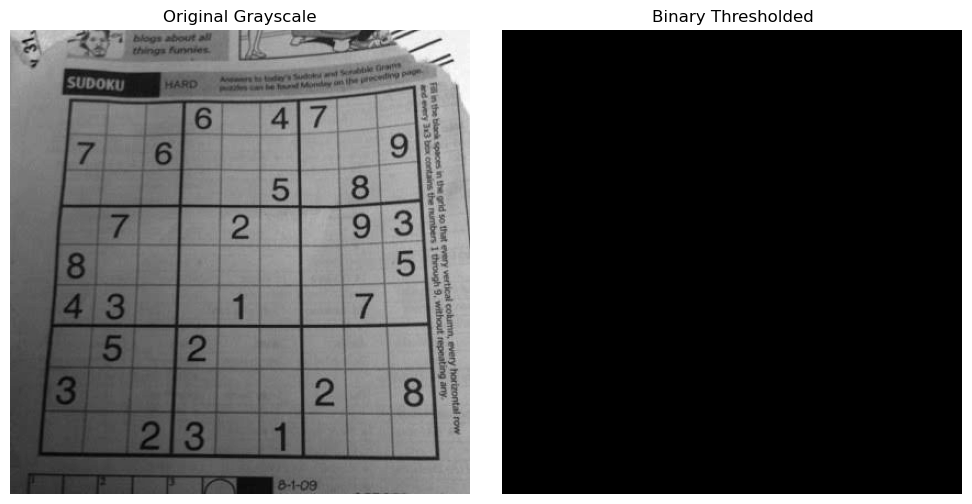

In [25]:
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire avec un seuil de 240
_, binary_thresholded_image = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_thresholded_image, cmap='gray')
plt.title("Binary Thresholded")
plt.axis('off')

plt.tight_layout()
plt.show()

Qu'est ce que vous remarquez ?!

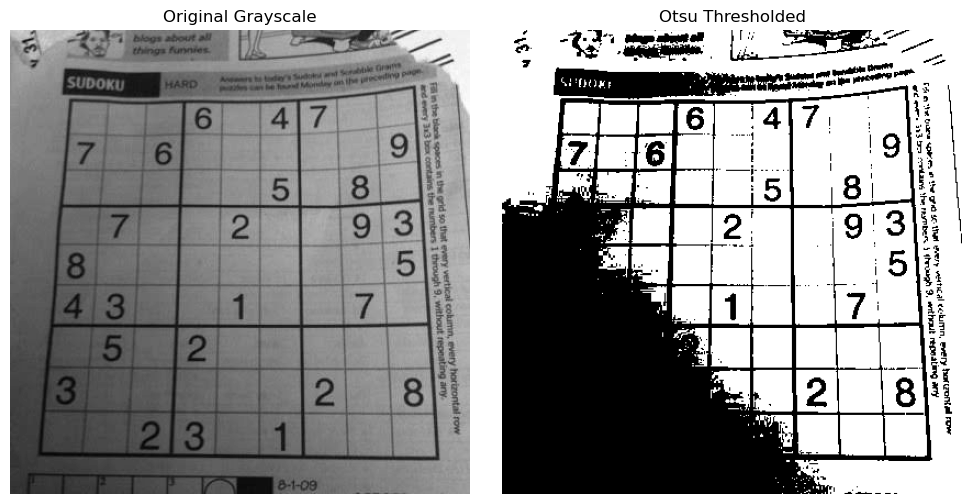

In [26]:
# appliquer "Otsu" seuillage
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire avec la méthode d'Otsu
_, otsu_thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(otsu_thresholded_image, cmap='gray')
plt.title("Otsu Thresholded")
plt.axis('off')

plt.tight_layout()
plt.show()


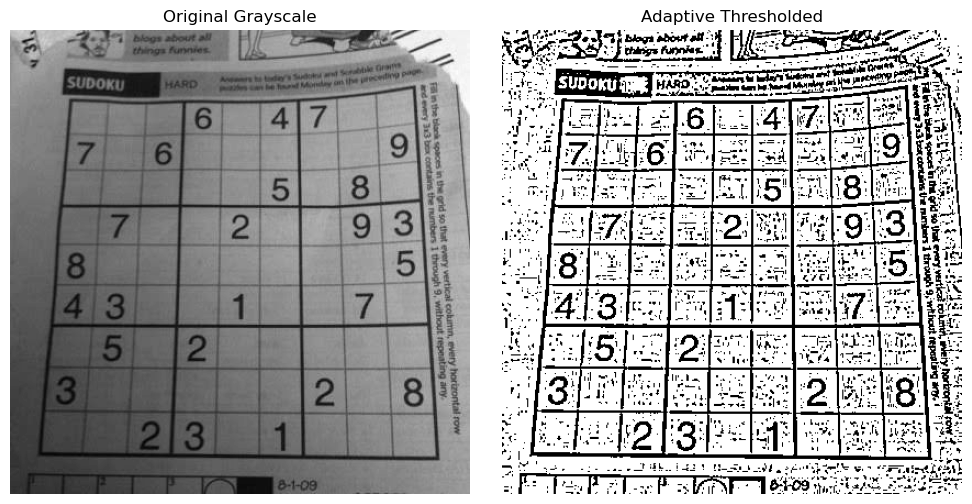

In [27]:
# appliquer "Adaptive threshold"
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire adaptatif
adaptive_thresholded_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(adaptive_thresholded_image, cmap='gray')
plt.title("Adaptive Thresholded")
plt.axis('off')

plt.tight_layout()
plt.show()

# Détection des bords

* Sobel
* Canny

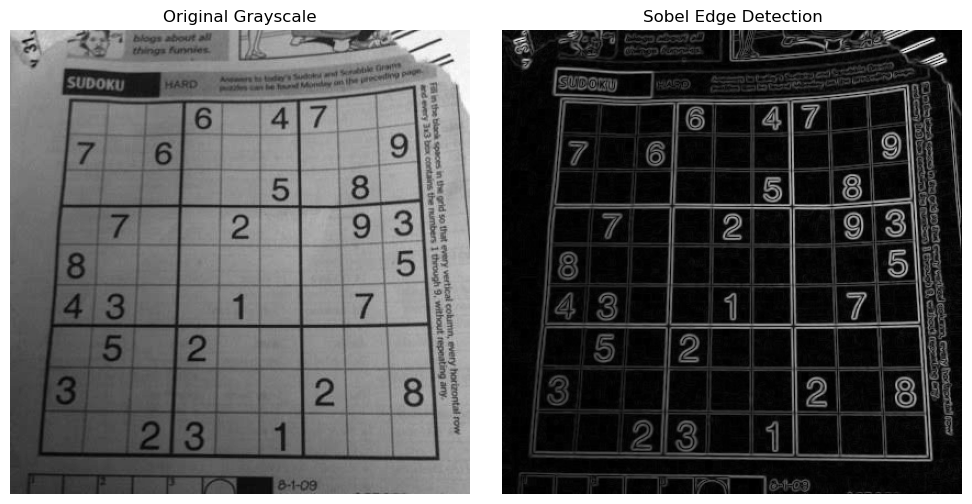

In [28]:
# utiliser la methode sobel pour détecter les bords
# Vous pouvez utiliser d'autres images de votre choix

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Appliquer la méthode Sobel pour détecter les contours
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Normaliser les valeurs entre 0 et 255
sobel_combined_normalized = cv2.normalize(sobel_combined, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(sobel_combined_normalized, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


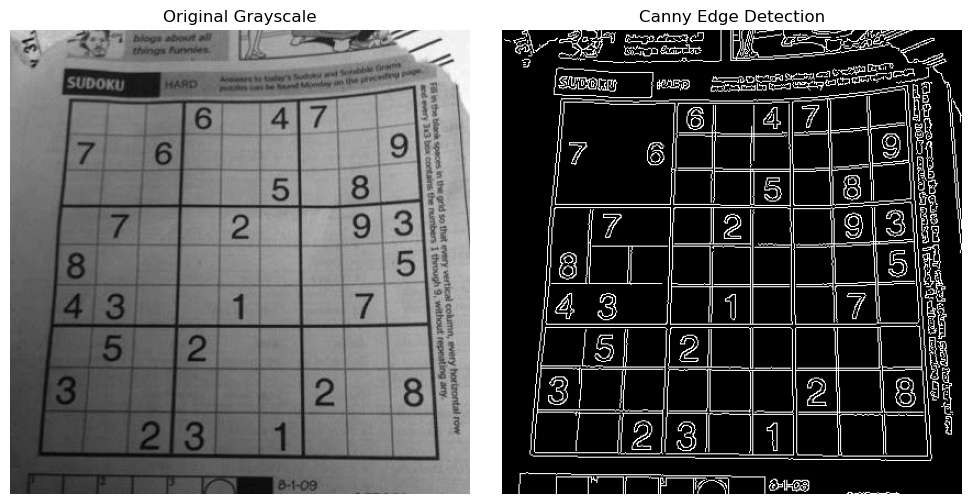

In [29]:
# Canny
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Appliquer la méthode Canny pour détecter les contours
canny_edges = cv2.Canny(gray_image, 50, 150)

# Afficher les images dans le notebook
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(122)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

# Détection des contours

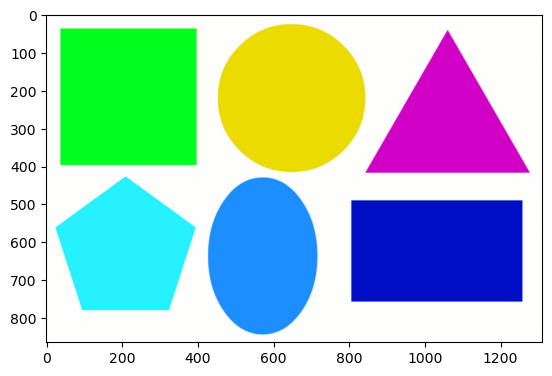

In [32]:
# charger l'image 02
# faites une recherche sur internet pour détecter les contours des objets dans image_02

image4 = cv2.imread('image_02.png')
plt.imshow(image2)


#  Compter des objets

Nombre de formes détectées : 43


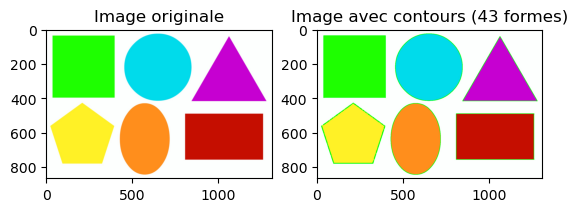

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_shapes(binary_image, contours):
    shape_count = len(contours)

    # Dessiner les rectangles de délimitation autour des formes
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

    return shape_count, image_with_contours

# Charger l'image
image = cv2.imread('image_02.png')

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuil binaire adaptatif pour obtenir une image binaire
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Appliquer une ouverture morphologique pour éliminer le bruit et séparer les formes
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Trouver les contours dans l'image binaire
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Compter les formes dans l'image
num_shapes, image_with_contours = count_shapes(opening, contours)

print(f"Nombre de formes détectées : {num_shapes}")

# Afficher l'image originale et l'image avec les contours
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image originale')

plt.subplot(122)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f'Image avec contours ({num_shapes} formes)')

plt.show()



sd0v# Challenge
Compter le nombre d'objets dans l'image 03 avec le code précédent.
- Qu'est ce que vous remarquez?
- Utiliser l'algorithme Watershed pour detecter et séparer les objets connectés.

In [ ]:
#

Bravo !